<a href="https://colab.research.google.com/github/ApurbaPaul-NLP/Machine-Learning/blob/main/21_08_2022_GradientTape_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [8]:
x=tf.Variable([[1.0,2.0,3.0],[4.0,5.0,6.0]],dtype=tf.float32)
print(x.numpy())

[[1. 2. 3.]
 [4. 5. 6.]]


In [9]:
with tf.GradientTape(persistent=True) as tape:
  y=x**2
print(tape.gradient(y,x).numpy()  )

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [15]:
tf.random.normal((3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.2128224 ,  0.73177063],
       [ 1.674952  ,  2.197606  ],
       [ 0.45466396,  0.84965634]], dtype=float32)>

In [19]:
tf.zeros(2, dtype=tf.float32)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [24]:
x=tf.Variable([[3.,4.]])
x.shape

TensorShape([1, 2])

In [25]:
tf.Variable([[1.,2.,3.],[4.,5.,6.]]).shape

TensorShape([2, 3])

In [27]:
w=tf.Variable([[1.,2.,3.],[4.,5.,6.]],dtype=tf.float32,name='w')
b=tf.Variable([4.,5.,6.],dtype=tf.float32,name='b')
x=tf.Variable([[3.,4.]])
with tf.GradientTape(persistent=True) as tape:
  y=x@w+b
  loss = tf.reduce_mean(y**2)
print(tape.gradient(y,x).numpy())  
print(tape.gradient(loss,x).numpy()) 

[[ 6. 15.]]
[[134.66667 320.6667 ]]


In [8]:
w=tf.Variable([[1.,2.,3.],[4.,5.,6.]],dtype=tf.float32,name='w')
b=tf.Variable([4.,5.,6.],dtype=tf.float32,name='b')
x=tf.Variable([[3.,4.]])
with tf.GradientTape(persistent=True) as tape:
  y=x@w+b
  loss = tf.reduce_mean(y**2)
print(tape.gradient(y,x).numpy())  
print(tape.gradient(loss,[w,b]))
[p,q]=tape.gradient(loss,[w,b])
print()
print(p.numpy())
print()
print(q.numpy())

[[ 6. 15.]]
[<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 46.      ,  62.000004,  78.      ],
       [ 61.333336,  82.66667 , 104.      ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([15.333334, 20.666668, 26.      ], dtype=float32)>]

[[ 46.        62.000004  78.      ]
 [ 61.333336  82.66667  104.      ]]

[15.333334 20.666668 26.      ]


In [9]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1 / x
#y0=2x
#y1=-1/x^2
print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())  #Here the result is 2x-1/x^2

3.75


In [10]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]

print(tape.gradient(y, x).numpy())#Here the result will be the sum of all the elements of the list

7.0


In [11]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.,5.,6.]

print(tape.gradient(y, x).numpy()) #Here the result will be the sum of all the elements of the list

18.0


In [12]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x**2 * [3., 4.,5.,6.]

print(tape.gradient(y, x).numpy()) #Here the result will be 2x*(the sum of all the elements of the list)== 2*2.0*18.0=72.0

72.0


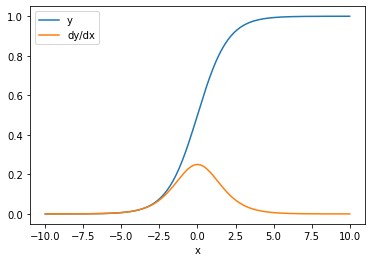

In [13]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')